# Examen parcial 1 (raizes y ~interpolacion)
* comience con el ejercicio más fácil
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10am del 29.07.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio I

Bajo ciertas condiciones, los dispositivos ópticos como los láseres pueden mostrar un comportamiento complejo en el perfil del rayo de luz.


<table><tr>
<td> <img src="nonlinear_behaviour.png" width="600" /> </td>
</tr></table>
 
Para un dispositivo óptico particular que consiste en un medio no lineal dentro de una cavidad óptica, esto sólo ocurre cuando la intensidad I se encuentra dentro de un cierto rango que está dado por la ecuación: 

$$f(x)=(x+1)^2 - c(x-1) < 0 $$

donde $x$ es la intensidad del campo eléctrico y $c$ es la fuerza de la absorción del 
medio no lineal. 

## 1. Cree una función llamada `f_cost` que reciba dos parámetros (x,c) y solo devuelva la función f(x) como se mencionó anteriormente.

In [1]:
# tu codigo:
def f_cost(x,c):
    funcion = (x+1)**2-c*(x-1)
    return funcion

## 2. Usando funcion `f_cost` haz un gráfico con seis curvas para a=5,10,15,20,25,30 y con x entre -10,30 (100 puntos)
* hacer que cada curva sea de un color diferente
* añadir etiquetas
* Para cual `c` esta funcion no tiene raices?

Text(0, 0.5, 'f(x)')

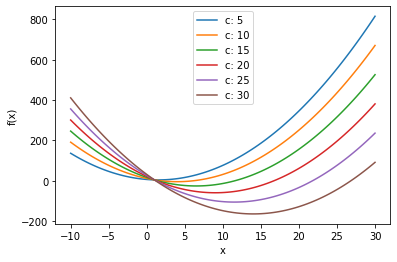

In [2]:
# tu codigo:
import matplotlib.pyplot as plt 
import numpy as np
x=np.linspace(-10,30,100)
fig,ax=plt.subplots(1,1)
for i in range(5,35,5):
    ax.plot(x,f_cost(x,i),label=f'c: {i}')
ax.legend()
ax.set_xlabel('x') 
ax.set_ylabel('f(x)')    


## 3. Usando los valores de 'c' para los cuales la función tiene raíces encontrar raíces izquierdas (Newton o Bisecion) y hacer una gráfica de esas raíces vs c. (preferiblemente use el bucle para encontrar todas las raíces) 

Text(0, 0.5, 'raiz')

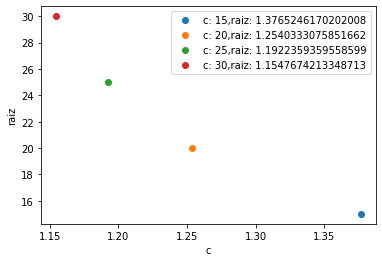

In [3]:
# tu codigo:
import scipy.optimize as optimize
fig,ax=plt.subplots(1,1)
for i in range(15,35,5):
    root = optimize.brentq(f_cost,0,5,args=(i,))
    ax.plot(root,i,'o',label=f'c: {i},raiz: {root}')
ax.legend()
ax.set_xlabel('c') 
ax.set_ylabel('raiz') 

## 4. Usando valores de 'c' para los cuales la función tiene raíces encontrar raíces derechas y hacer una gráfica de esas raíces vs c (preferiblemente use el bucle para encontrar todas las raíces)

In [4]:
# tu codigo:

Text(0, 0.5, 'raiz')

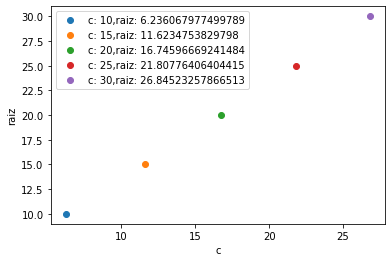

In [5]:
import scipy.optimize as optimize
fig,ax=plt.subplots(1,1)
for i in range(10,35,5):
    root = optimize.brentq(f_cost,5,30,args=(i,))
    ax.plot(root,i,'o',label=f'c: {i},raiz: {root}')
ax.legend()
ax.set_xlabel('c') 
ax.set_ylabel('raiz') 

# Ejercicio II

Los datos para la presión frente a la temperatura de un gas cuantico se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $) https://github.com/mhemmg/datasets/tree/master/pressure_vs_temperature

* 1. importar los datos usando pandas
* 2. hacer un gráfico de $P$ vs $T$ (curva tiene que tener etiquieta)
* 3. interpolar los puntos (100 puntos) 
* 4. anadir curva a grafico anterior con datos interpolados de $P_{interp}$ vs $T_{interp}$ (curva tiene que tener etiquieta)
**graficos tienen que tener etiquietas**

In [6]:
### su codigos aqui
import pandas as pd
data = pd.read_csv('data_pressure_vs_temparature.csv',sep=',')

Text(0, 0.5, 'Pressure')

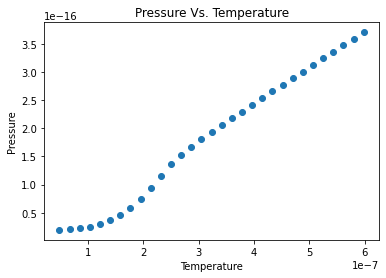

In [7]:
### su codigos aqui
fig,ax=plt.subplots(1,1)
data_num = data.to_numpy()

ax.plot(data['Temperature'],data['Pressure'],'o')
ax.set_title("Pressure Vs. Temperature")
ax.set_xlabel('Temperature') 
ax.set_ylabel('Pressure') 

In [8]:
### su codigos aqui
x=data_num[:,0]
y=data_num[:,1]
from scipy.interpolate import interp1d
data_num = data.to_numpy()
fspline1 = interp1d(x,y, kind='cubic')
fspline1(xnew)

NameError: name 'xnew' is not defined

In [ ]:
### su codigos aqui
fig,ax=plt.subplots(1,1)
data_num = data.to_numpy()

ax.plot(xnew,fspline1(xnew))
ax.set_title("Pressure interpolada Vs. Temperature interpolada")
ax.set_xlabel('Temperature interpolada') 
ax.set_ylabel('Pressure interpolada') 

# Ejercicio III

El `polilogaritmo` que recibe dos parametros (https://www.mpmath.org/doc/current/functions/zeta.html) es una funcion complicada de calcular 

In [ ]:
import mpmath
import math
import numpy as np
import time

#### Para un valor se puede obtener rápidamente el resultado


In [ ]:
mpmath.polylog(3.0/2.0, 0.5)

#### Para calcular 50 puntos uno necesita mas tiempo

In [ ]:
timestamp1 = time.time()
xgrid1=np.linspace(0.0,1.0,50)

poly1=[]
for x in xgrid1:
    poly1.append(mpmath.polylog(3.0/2.0,x))

    
timestamp2 = time.time()
print (f"Esta operacion tomo : {(timestamp2 - timestamp1):.2f} segundos")

### Aqui es el plot (solo para mostrar el comportamiento)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax=plt.subplots(1,1)
ax.plot(xgrid1,poly1,'.r',label='calculated points using Taylor exp.')
ax.set_xlabel('xgrid1')
ax.set_ylabel('poly1')

ax.legend()
ax.grid('True')

# 1. Ahora te imaginas que tienes que calcular el polilogaritmo para 50000 puntos. ¿qué harás?

In [ ]:
### su codigo aqui
timestamp1 = time.time()
polilogaritmo = interp1d(xgrid1,poly1, kind='cubic')
xgridnew = np.linspace(0,1,50000)
polilogaritmo(xgridnew)

timestamp2 = time.time()
print (f"Esta operacion tomo : {(timestamp2 - timestamp1):.2f} segundos")

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(xgridnew,polilogaritmo(xgridnew),'.r',label='calculated points using Taylor exp.')
ax.set_xlabel('xgridnew')
ax.set_ylabel('polilogaritmo')

ax.legend()
ax.grid('True')

# 2. Cree una función llamada `poly_interp()` que devolverá un único punto interpolado de los 50 puntos originales

`p1=poly_interp(x1)`

In [ ]:
### su codigo aqui
def poly_interp(x):
    fspline1 = interp1d(xgrid1,poly1, kind='cubic')
    fs = fspline1(x)
    return fs
p1=poly_interp(0.4)
p1

# Criterias:

```
# Exercise 1 (max 4p):
#   f_cost + plot (max: 1.5p):                   1.5p   
#   stating for which c no roots (max: 0.5p):    0.0p 
#   left roots + plot (max: 1.0p):               1.0p 
#   right roots + plot (max: 1.0p):              1.0p 

# Exercise 2 (max 4p):
#   loading data + plot (max: 2.0p):             1.0p   
#   interpolating + plot (max. 2.0p):            1.0p 


# Exercise 3 (max 2p):
#   interpolation of polylog (max: 1.0p):        1.0p   
#   func to interp a point (max: 1.0p):          1.0p   

# TOTAL:                                         7.5p (out of 10p) 

```    